Importing Programs

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Importing Files

In [2]:
Forest_csv = pd.read_csv('MOG Project/Forest Area by Share of Country.csv')
CO2_csv = pd.read_csv('MOG Project/CO2 Emissions per Capita by Country.csv')
GDP_csv = pd.read_csv('MOG Project/GDP per Capita by Country.csv')

Examine Data

In [3]:
Forest_csv.head()

,Entity,Code,Year,Forest cover
0,Afghanistan,AFG,1990,1.850994
1,Afghanistan,AFG,1991,1.850994
2,Afghanistan,AFG,1992,1.850994
3,Afghanistan,AFG,1993,1.850994
4,Afghanistan,AFG,1994,1.850994


In [4]:
CO2_csv.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001922
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [5]:
GDP_csv.head()

,Entity,Code,Year,GDP per capita,417485-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN
2,Afghanistan,AFG,1952,1189.0,NaN
3,Afghanistan,AFG,1953,1240.0,NaN
4,Afghanistan,AFG,1954,1245.0,NaN


In [6]:
Forest_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entity        7974 non-null   object 
 1   Code          6862 non-null   object 
 2   Year          7974 non-null   int64  
 3   Forest cover  7974 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 249.3+ KB


In [7]:
CO2_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26915 entries, 0 to 26914
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26915 non-null  object 
 1   Code                               23288 non-null  object 
 2   Year                               26915 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26915 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
GDP_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19876 entries, 0 to 19875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              19876 non-null  object 
 1   Code                19651 non-null  object 
 2   Year                19876 non-null  int64  
 3   GDP per capita      19876 non-null  float64
 4   417485-annotations  21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 776.5+ KB


Calculate Rows & Columns Data

In [9]:
Forest_csv.shape 

(7974, 4)

In [10]:
CO2_csv.shape

(26915, 4)

In [11]:
GDP_csv.shape

(19876, 5)

Sort Data (allows determination of most recent yearly data)

In [12]:
df_forestsort = Forest_csv.sort_values("Year", ascending=False)

In [13]:
df_forestsort.head()

,Entity,Code,Year,Forest cover
7973,Zimbabwe,ZWE,2020,45.093912
2982,Guatemala,GTM,2020,32.920866
2827,Greece,GRC,2020,30.269977
2858,Greenland,GRL,2020,0.000536
2889,Grenada,GRD,2020,52.058824


In [14]:
df_CO2sort = CO2_csv.sort_values("Year", ascending=False)

In [15]:
df_CO2sort.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
26914,Zimbabwe,ZWE,2021,0.706293
5489,Congo,COG,2021,1.279062
17098,New Zealand,NZL,2021,6.587057
5262,China,CHN,2021,8.045740
22931,Sudan,SDN,2021,0.460786


In [16]:
df_GDPsort = GDP_csv.sort_values("Year", ascending=False)

In [17]:
df_GDPsort.head()

,Entity,Code,Year,GDP per capita,417485-annotations
19875,Zimbabwe,ZWE,2018,1611.4052,NaN
7685,Israel,ISR,2018,32954.7700,NaN
8881,Kuwait,KWT,2018,65520.7400,NaN
4225,Dominican Republic,DOM,2018,15912.3990,NaN
17538,Trinidad and Tobago,TTO,2018,28549.4080,NaN


Drop Data (NA, Duplicates, Columns of insignificance)

In [18]:
df_forestdrop = df_forestsort.dropna(subset=["Forest cover"])

In [19]:
df_forestdrop.shape

(7974, 4)

In [20]:
df_CO2drop = df_CO2sort.dropna(subset=["Annual CO₂ emissions (per capita)"])

In [21]:
df_CO2drop.shape

(26915, 4)

In [22]:
df_GDPdrop = df_GDPsort.dropna(subset=["GDP per capita"])

In [23]:
df_GDPdrop.shape

(19876, 5)

In [24]:
df_forestduplicates = df_forestdrop.drop_duplicates()

In [25]:
df_CO2duplicates = df_CO2drop.drop_duplicates()

In [26]:
df_GDPduplicates = df_GDPdrop.drop_duplicates()

In [27]:
df_forestna = df_forestduplicates.fillna("FORGET")

In [28]:
df_forestclean = df_forestna

In [29]:
df_forestclean.head()

,Entity,Code,Year,Forest cover
7973,Zimbabwe,ZWE,2020,45.093912
2982,Guatemala,GTM,2020,32.920866
2827,Greece,GRC,2020,30.269977
2858,Greenland,GRL,2020,0.000536
2889,Grenada,GRD,2020,52.058824


In [30]:
df_CO2na = df_CO2duplicates.fillna("FORGET")

In [31]:
df_CO2clean = df_CO2na

In [32]:
df_CO2clean.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
26914,Zimbabwe,ZWE,2021,0.706293
5489,Congo,COG,2021,1.279062
17098,New Zealand,NZL,2021,6.587057
5262,China,CHN,2021,8.045740
22931,Sudan,SDN,2021,0.460786


In [33]:
df_GDPna = df_GDPduplicates.fillna("FORGET")

In [34]:
df_GDPna.head()

,Entity,Code,Year,GDP per capita,417485-annotations
19875,Zimbabwe,ZWE,2018,1611.4052,FORGET
7685,Israel,ISR,2018,32954.7700,FORGET
8881,Kuwait,KWT,2018,65520.7400,FORGET
4225,Dominican Republic,DOM,2018,15912.3990,FORGET
17538,Trinidad and Tobago,TTO,2018,28549.4080,FORGET


In [35]:
df_GDPcolumndrop = df_GDPduplicates.drop(columns=["417485-annotations"])

In [36]:
df_GDPcolumndrop.head()

,Entity,Code,Year,GDP per capita
19875,Zimbabwe,ZWE,2018,1611.4052
7685,Israel,ISR,2018,32954.7700
8881,Kuwait,KWT,2018,65520.7400
4225,Dominican Republic,DOM,2018,15912.3990
17538,Trinidad and Tobago,TTO,2018,28549.4080


Calculate & Exclude Missing Data

In [37]:
df_forestnull = df_forestna.isnull().sum()

In [38]:
print(df_forestnull)

Entity          0
Code            0
Year            0
Forest cover    0
dtype: int64


In [39]:
df_CO2null = df_CO2na.isnull().sum()

In [40]:
print(df_CO2null)

Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


In [41]:
df_GDPnull = df_GDPcolumndrop.isnull().sum()

In [42]:
print(df_GDPnull)

Entity              0
Code              225
Year                0
GDP per capita      0
dtype: int64


In [43]:
df_GDPclean = df_GDPcolumndrop.dropna(axis = 0, how ='any')

In [44]:
df_GDPclean.shape

(19651, 4)

Rename Columns

In [45]:
df_Forestrename = df_forestclean.rename(columns = {'Entity':'Country', 'Code':'Country by Code', 'Forest cover':'Forest cover by Country Share'})
df_CO2rename = df_CO2clean.rename(columns = {'Entity':'Country', 'Code':'Country by Code', 'Annual CO₂ emissions (per capita)':'Annual CO₂ Emissions per capita'})
df_GDPrename = df_GDPclean.rename(columns = {'Entity':'Country', 'Code':'Country by Code'})                  

Select Data by Subsetting (2008-2018)

In [46]:
df_ForestSubset = df_Forestrename[(df_Forestrename["Year"] >= 2008) & (df_Forestrename["Year"] < 2019)]

In [47]:
df_ForestSubset.shape

(2845, 4)

In [48]:
df_CO2Subset = df_CO2rename[(df_CO2rename["Year"] >= 2008) & (df_CO2rename["Year"] < 2019)]

In [49]:
df_CO2Subset.shape

(2596, 4)

In [50]:
df_GDPSubset = df_GDPrename[(df_GDPrename["Year"] >= 2008) & (df_GDPrename["Year"] < 2019)]

In [51]:
df_GDPSubset.shape

(1852, 4)

Index Sort

In [52]:
df_ForestSubset.sort_index()

,Country,Country by Code,Year,Forest cover by Country Share
18,Afghanistan,AFG,2008,1.850994
19,Afghanistan,AFG,2009,1.850994
20,Afghanistan,AFG,2010,1.850994
21,Afghanistan,AFG,2011,1.850994
22,Afghanistan,AFG,2012,1.850994
...,...,...,...,...
7967,Zimbabwe,ZWE,2014,45.808453
7968,Zimbabwe,ZWE,2015,45.689363
7969,Zimbabwe,ZWE,2016,45.570273
7970,Zimbabwe,ZWE,2017,45.451183


In [53]:
df_CO2Subset.sort_index()

,Country,Country by Code,Year,Annual CO₂ Emissions per capita
59,Afghanistan,AFG,2008,0.160989
60,Afghanistan,AFG,2009,0.233406
61,Afghanistan,AFG,2010,0.296733
62,Afghanistan,AFG,2011,0.404740
63,Afghanistan,AFG,2012,0.329389
...,...,...,...,...
26907,Zimbabwe,ZWE,2014,0.862179
26908,Zimbabwe,ZWE,2015,0.865772
26909,Zimbabwe,ZWE,2016,0.728822
26910,Zimbabwe,ZWE,2017,0.650533


In [54]:
df_GDPSubset.sort_index()

,Country,Country by Code,Year,GDP per capita
58,Afghanistan,AFG,2008,1319.6074
59,Afghanistan,AFG,2009,1557.3206
60,Afghanistan,AFG,2010,1627.6716
61,Afghanistan,AFG,2011,1792.0000
62,Afghanistan,AFG,2012,1945.0000
...,...,...,...,...
19871,Zimbabwe,ZWE,2014,1594.0000
19872,Zimbabwe,ZWE,2015,1560.0000
19873,Zimbabwe,ZWE,2016,1534.0000
19874,Zimbabwe,ZWE,2017,1582.3662


Merge Datasets

In [55]:
Forest_CO2_GDP_MERGE1 = df_ForestSubset.merge(df_CO2Subset, left_on=["Country", "Country by Code", "Year"], right_on=["Country", "Country by Code", "Year"])

In [56]:
Forest_CO2_GDP_MERGE1.shape

(2334, 5)

In [57]:
Forest_CO2_GDP_MERGE1.head()

,Country,Country by Code,Year,Forest cover by Country Share,Annual CO₂ Emissions per capita
0,Honduras,HND,2018,57.208759,1.006985
1,Iran,IRN,2018,6.586553,8.186843
2,Hungary,HUN,2018,22.530506,5.059481
3,Iceland,ISL,2018,0.499491,10.366745
4,Indonesia,IDN,2018,49.688488,2.260322


In [58]:
Forest_CO2_GDP_MERGE2 = Forest_CO2_GDP_MERGE1.merge(df_GDPSubset, left_on=["Country", "Country by Code", "Year"], right_on=["Country", "Country by Code", "Year"])

In [59]:
Forest_CO2_GDP_MERGE2.shape

(1777, 6)

In [60]:
Forest_CO2_GDP_MERGE2.head()

,Country,Country by Code,Year,Forest cover by Country Share,Annual CO₂ Emissions per capita,GDP per capita
0,Honduras,HND,2018,57.208759,1.006985,5041.6353
1,Iran,IRN,2018,6.586553,8.186843,17011.3050
2,Hungary,HUN,2018,22.530506,5.059481,25622.8120
3,Iceland,ISL,2018,0.499491,10.366745,43438.5430
4,Indonesia,IDN,2018,49.688488,2.260322,11851.7370


Get Continent Data (Scraping)

In [61]:
import urllib.request
url = "https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv"
with urllib.request.urlopen(url) as i:
    html = i.read()
Continent_Data_Codes = pd.read_html(html)[0]
print(Continent_Data_Codes.head())


   Unnamed: 0 Continent   Country
0         NaN    Africa   Algeria
1         NaN    Africa    Angola
2         NaN    Africa     Benin
3         NaN    Africa  Botswana
4         NaN    Africa   Burkina


In [62]:
Continent_Data_Codes.shape

(194, 3)

Rename, Replace missing Continent Codes within Rows & Merge

In [63]:
Continent_Data_Codes["Country"]= Continent_Data_Codes["Country"].str.replace("US","United States").replace("Russian Federation","Russia").replace('CZ',"Czechia").replace('Congo, Democratic Republic of',"Congo").replace('Micronesia', "Micronesia (country)").replace("Burma (Myanmar)","Myanmar", regex=True).replace("Macedonia","North Macedonia").replace("Korea, North","North Korea").replace("Korea, South","South Korea")

In [64]:
Continent_Data_Codes.to_csv("Continent_Data_Codes.csv")
import pandas as pd

In [65]:
Continent_Data_Code = pd.read_csv("Continent_Data_Codes.csv")

In [66]:
Continent_Data_Code.head()

,Unnamed: 0.1,Unnamed: 0,Continent,Country
0,0,NaN,Africa,Algeria
1,1,NaN,Africa,Angola
2,2,NaN,Africa,Benin
3,3,NaN,Africa,Botswana
4,4,NaN,Africa,Burkina


In [67]:
Continent_Data_Code_Clean = Continent_Data_Code.drop(columns=["Unnamed: 0.1"], axis=1, inplace=True)

In [68]:
Continent_Data_Code.head()

,Unnamed: 0,Continent,Country
0,NaN,Africa,Algeria
1,NaN,Africa,Angola
2,NaN,Africa,Benin
3,NaN,Africa,Botswana
4,NaN,Africa,Burkina


In [69]:
Forest_CO2_GDP_MERGE3 = Forest_CO2_GDP_MERGE2.merge(Continent_Data_Code, left_on=["Country"], right_on=["Country"])

In [70]:
Forest_CO2_GDP_Continent = Forest_CO2_GDP_MERGE3

In [71]:
Forest_CO2_GDP_Continent.shape

(1727, 8)

In [72]:
Forest_CO2_GDP_Continent.head()

,Country,Country by Code,Year,Forest cover by Country Share,Annual CO₂ Emissions per capita,GDP per capita,Unnamed: 0,Continent
0,Honduras,HND,2018,57.208759,1.006985,5041.6353,NaN,North America
1,Honduras,HND,2017,57.395674,1.062808,4941.2993,NaN,North America
2,Honduras,HND,2016,57.582590,1.027641,4796.0000,NaN,North America
3,Honduras,HND,2015,57.769506,1.113343,4706.0000,NaN,North America
4,Honduras,HND,2014,57.969059,1.038715,4620.0000,NaN,North America


Layout and Order

In [73]:
Forest_CO2_GDP_Continent_Layout = Forest_CO2_GDP_Continent[["Continent","Country","Country by Code", "GDP per capita", "Annual CO₂ Emissions per capita","Forest cover by Country Share","Year"]] 

In [74]:
Forest_CO2_GDP_Continent_Final = Forest_CO2_GDP_Continent_Layout

In [75]:
Forest_CO2_GDP_Continent_Final.head()

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
0,North America,Honduras,HND,5041.6353,1.006985,57.208759,2018
1,North America,Honduras,HND,4941.2993,1.062808,57.395674,2017
2,North America,Honduras,HND,4796.0000,1.027641,57.582590,2016
3,North America,Honduras,HND,4706.0000,1.113343,57.769506,2015
4,North America,Honduras,HND,4620.0000,1.038715,57.969059,2014


Countries by Rank

In [76]:
GDP_Rank_Large = Forest_CO2_GDP_Continent_Final.nlargest(n=22, columns=['GDP per capita'], keep='first')

In [77]:
GDP_Rank_Large.head(22)

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
1674,Asia,Qatar,QAT,156299.000,33.733630,0.000000,2016
1675,Asia,Qatar,QAT,156029.000,37.823303,0.000000,2015
1679,Asia,Qatar,QAT,155533.000,44.146310,0.000000,2011
1676,Asia,Qatar,QAT,155069.000,41.341140,0.000000,2014
1673,Asia,Qatar,QAT,154669.030,36.942753,0.000000,2017
1677,Asia,Qatar,QAT,154159.000,41.262188,0.000000,2013
1678,Asia,Qatar,QAT,153922.000,49.233470,0.000000,2012
1672,Asia,Qatar,QAT,153764.170,34.420223,0.000000,2018
1680,Asia,Qatar,QAT,134802.780,41.972393,0.000000,2010
1681,Asia,Qatar,QAT,115283.414,42.599243,0.000000,2009


In [78]:
GDP_Rank_Small = Forest_CO2_GDP_Continent_Final.nsmallest(n=22, columns=['GDP per capita'], keep='first')

In [79]:
GDP_Rank_Small.head(11)

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
818,Africa,Central African Republic,CAF,561.0000,0.025960,36.089441,2014
819,Africa,Central African Republic,CAF,567.0000,0.024414,36.137597,2013
817,Africa,Central African Republic,CAF,576.0000,0.037253,36.041285,2015
816,Africa,Central African Republic,CAF,589.0000,0.040344,35.993130,2016
815,Africa,Central African Republic,CAF,606.6967,0.043263,35.944974,2017
814,Africa,Central African Republic,CAF,623.4889,0.043150,35.896819,2018
748,Africa,Burundi,BDI,651.3589,0.059497,10.889408,2018
750,Africa,Burundi,BDI,665.0000,0.042871,10.889408,2016
749,Africa,Burundi,BDI,671.3169,0.047545,10.889408,2017
751,Africa,Burundi,BDI,694.0000,0.036744,10.889408,2015


In [80]:
CO2_Rank_Large = Forest_CO2_GDP_Continent_Final.nlargest(n=22, columns=['Annual CO₂ Emissions per capita'], keep='first')

In [81]:
CO2_Rank_Large.head(22)

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
1678,Asia,Qatar,QAT,153922.000,49.233470,0.000000,2012
1682,Asia,Qatar,QAT,107402.055,44.490210,0.000000,2008
1679,Asia,Qatar,QAT,155533.000,44.146310,0.000000,2011
1681,Asia,Qatar,QAT,115283.414,42.599243,0.000000,2009
1680,Asia,Qatar,QAT,134802.780,41.972393,0.000000,2010
1676,Asia,Qatar,QAT,155069.000,41.341140,0.000000,2014
1677,Asia,Qatar,QAT,154159.000,41.262188,0.000000,2013
1675,Asia,Qatar,QAT,156029.000,37.823303,0.000000,2015
1673,Asia,Qatar,QAT,154669.030,36.942753,0.000000,2017
1672,Asia,Qatar,QAT,153764.170,34.420223,0.000000,2018


In [82]:
CO2_Rank_Small = Forest_CO2_GDP_Continent_Final.nsmallest(n=22, columns=['Annual CO₂ Emissions per capita'], keep='first')

In [83]:
CO2_Rank_Small.head(22)

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
757,Africa,Burundi,BDI,709.0326,0.019352,7.552181,2009
819,Africa,Central African Republic,CAF,567.0000,0.024414,36.137597,2013
758,Africa,Burundi,BDI,708.6786,0.025229,7.552181,2008
818,Africa,Central African Republic,CAF,561.0000,0.025960,36.089441,2014
756,Africa,Burundi,BDI,717.6115,0.032519,7.552181,2010
823,Africa,Central African Republic,CAF,898.7005,0.035319,36.330219,2009
752,Africa,Burundi,BDI,748.0000,0.035751,10.221963,2014
822,Africa,Central African Republic,CAF,910.3104,0.036168,36.282064,2010
751,Africa,Burundi,BDI,694.0000,0.036744,10.889408,2015
824,Africa,Central African Republic,CAF,901.8513,0.036909,36.378375,2008


In [84]:
Forest_Cover_Rank_Large = Forest_CO2_GDP_Continent_Final.nlargest(n=22, columns=['Forest cover by Country Share'], keep='first')

In [85]:
Forest_Cover_Rank_Large.head(22)

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
538,Africa,Gabon,GAB,13330.255,2.601791,91.821042,2008
537,Africa,Gabon,GAB,13617.896,2.559855,91.801409,2009
536,Africa,Gabon,GAB,14926.699,2.795390,91.781775,2010
535,Africa,Gabon,GAB,16403.000,2.781508,91.735662,2011
534,Africa,Gabon,GAB,16932.000,3.065155,91.689549,2012
533,Africa,Gabon,GAB,17532.000,3.115721,91.643435,2013
532,Africa,Gabon,GAB,18053.000,3.238363,91.597322,2014
531,Africa,Gabon,GAB,18389.000,3.192252,91.551209,2015
530,Africa,Gabon,GAB,18413.000,3.126100,91.505103,2016
529,Africa,Gabon,GAB,17963.014,2.936988,91.458998,2017


In [86]:
Forest_Cover_Rank_Small = Forest_CO2_GDP_Continent_Final.nsmallest(n=22, columns=['Forest cover by Country Share'], keep='first')

In [87]:
Forest_Cover_Rank_Small.head(22)

,Continent,Country,Country by Code,GDP per capita,Annual CO₂ Emissions per capita,Forest cover by Country Share,Year
1672,Asia,Qatar,QAT,153764.170,34.420223,0.000000,2018
1673,Asia,Qatar,QAT,154669.030,36.942753,0.000000,2017
1674,Asia,Qatar,QAT,156299.000,33.733630,0.000000,2016
1675,Asia,Qatar,QAT,156029.000,37.823303,0.000000,2015
1676,Asia,Qatar,QAT,155069.000,41.341140,0.000000,2014
1677,Asia,Qatar,QAT,154159.000,41.262188,0.000000,2013
1678,Asia,Qatar,QAT,153922.000,49.233470,0.000000,2012
1679,Asia,Qatar,QAT,155533.000,44.146310,0.000000,2011
1680,Asia,Qatar,QAT,134802.780,41.972393,0.000000,2010
1681,Asia,Qatar,QAT,115283.414,42.599243,0.000000,2009


Converting CO2_GDP_Continent_Final to CSV (as backup to ensure accuracy)

In [88]:
Forest_CO2_GDP_Continent_Final.to_csv("Forest_CO2_GDP_Continent_Final.csv")

Grouping Datasets (Mean)

In [89]:
Continent_MASTER = Forest_CO2_GDP_Continent_Final.groupby(["Continent", "Year"]).mean()

In [90]:
Continent_MASTER.head()

GDP per capita  Annual CO₂ Emissions per capita  \
Continent Year                                                    
Africa    2008     5657.831064                         1.242500   
          2009     5735.482668                         1.220022   
          2010     5899.989998                         1.289631   
          2011     5764.489362                         1.302188   
          2012     6282.127660                         1.328475   

                Forest cover by Country Share  
Continent Year                                 
Africa    2008                      31.119082  
          2009                      30.982434  
          2010                      30.845786  
          2011                      30.719654  
          2012                      30.593522

In [91]:
Continent_MASTER.shape

(66, 3)

In [92]:
print(Continent_MASTER)

                    GDP per capita  Annual CO₂ Emissions per capita  \
Continent     Year                                                    
Africa        2008     5657.831064                         1.242500   
              2009     5735.482668                         1.220022   
              2010     5899.989998                         1.289631   
              2011     5764.489362                         1.302188   
              2012     6282.127660                         1.328475   
...                            ...                              ...   
South America 2014    14483.600000                         2.858082   
              2015    14527.000000                         2.807327   
              2016    13990.100000                         2.762583   
              2017    13918.316260                         2.667020   
              2018    13811.918240                         2.521707   

                    Forest cover by Country Share  
Continent     Year      

Converting Continent_MASTER to CSV (as backup to ensure accuracy)

In [93]:
Continent_MASTER.to_csv("Continent_MASTER.csv")

Visualising Data

Relational Plots

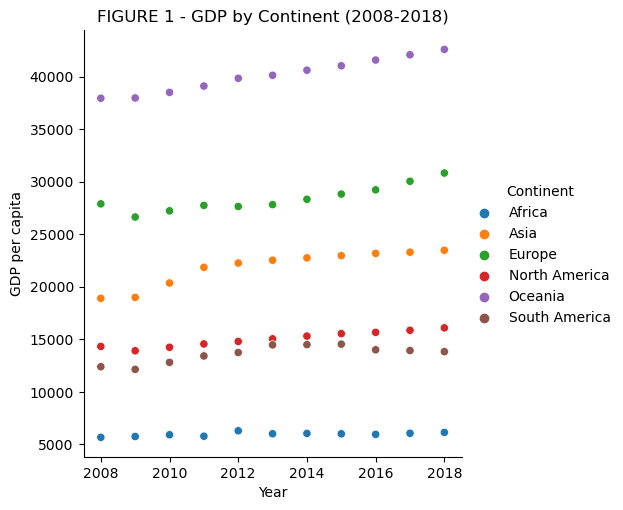

In [94]:
Continent_GDP_Plot = sns.relplot(data=Continent_MASTER, x='Year', y='GDP per capita', hue="Continent").set(title="FIGURE 1 - GDP by Continent (2008-2018)")

In [95]:
plt.show()

In [96]:
Continent_CO2_Emissions_Plot = sns.relplot(data=Continent_MASTER, x="Year", y="Annual CO₂ Emissions per capita", hue="Continent").set(title="FIGURE 2 - CO₂ Emissions by Continent (2008-2018)")

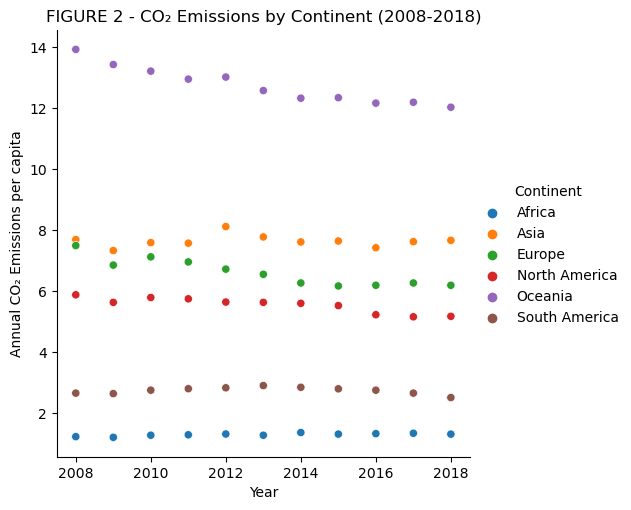

In [97]:
plt.show()

In [98]:
Continent_Forest_Plot = sns.relplot(data=Continent_MASTER, x="Year", y="Forest cover by Country Share", hue="Continent").set(title="FIGURE 3 - Forest cover by Continent (2008-2018)")

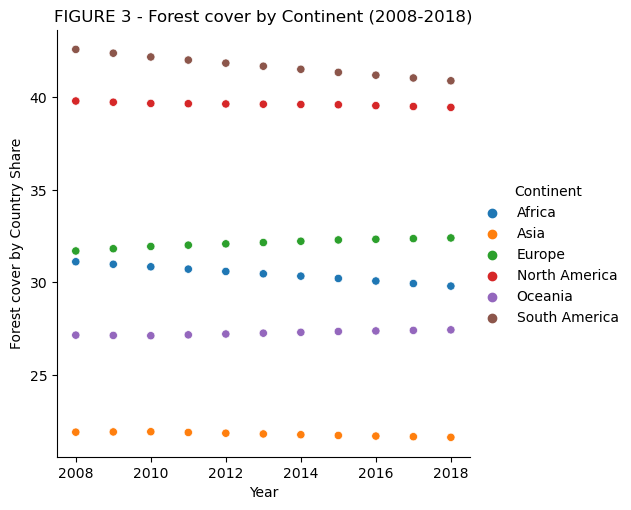

In [99]:
plt.show()

Scatter Plots

In [100]:
Continent_CO2_vs_GDP_Plot = sns.scatterplot(data=Forest_CO2_GDP_Continent_Final, x="GDP per capita", y="Annual CO₂ Emissions per capita", hue="Continent").set(title="FIGURE 4 - CO₂ vs GDP by Continent (2008-2018)")

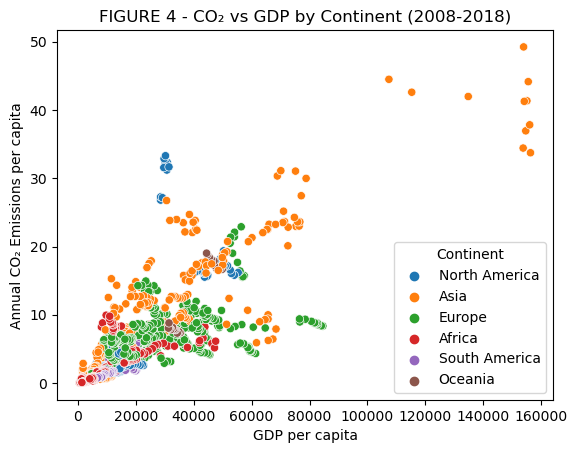

In [101]:
plt.show()

In [102]:
Global_GDP_vs_CO2_YEAR = sns.scatterplot(data=Forest_CO2_GDP_Continent_Final, x='GDP per capita', y='Annual CO₂ Emissions per capita', hue='Year', size='Year').set(title="FIGURE 5 - GDP vs CO₂ by Year (2008-2018)")

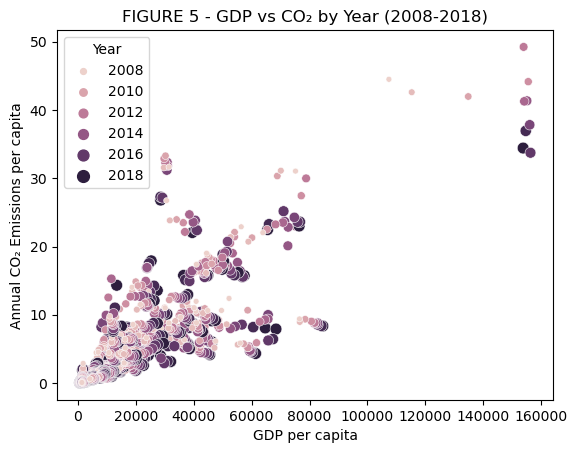

In [103]:
plt.show()

Joint Plots

In [104]:
Global_ForestShare_vs_CO2_Continent = sns.jointplot(data=Forest_CO2_GDP_Continent_Final, x="Forest cover by Country Share", y="Annual CO₂ Emissions per capita", hue="Continent").fig.suptitle("FIGURE 6 - Forest Cover vs CO₂ by Continent(2008-2018)")


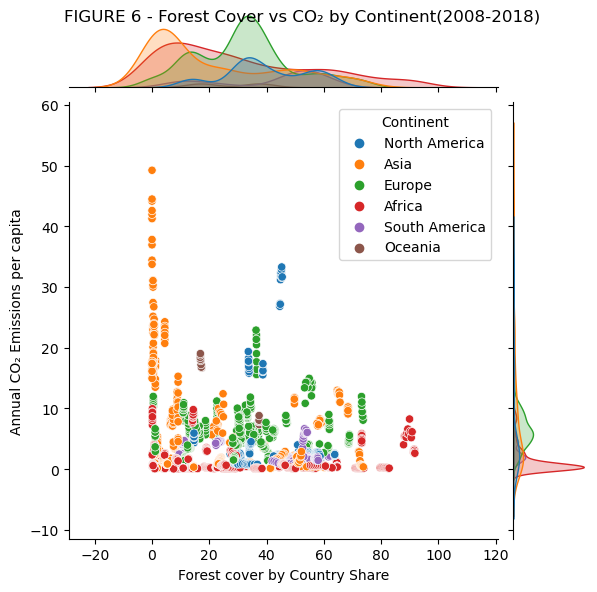

In [105]:
plt.show()

In [106]:
Global_ForestShare_vs_CO2_Continent = sns.jointplot(data=Forest_CO2_GDP_Continent_Final, x="Forest cover by Country Share", y="GDP per capita", hue="Continent").fig.suptitle("FIGURE 7 - Forest Cover vs GDP by Continent(2008-2018)")

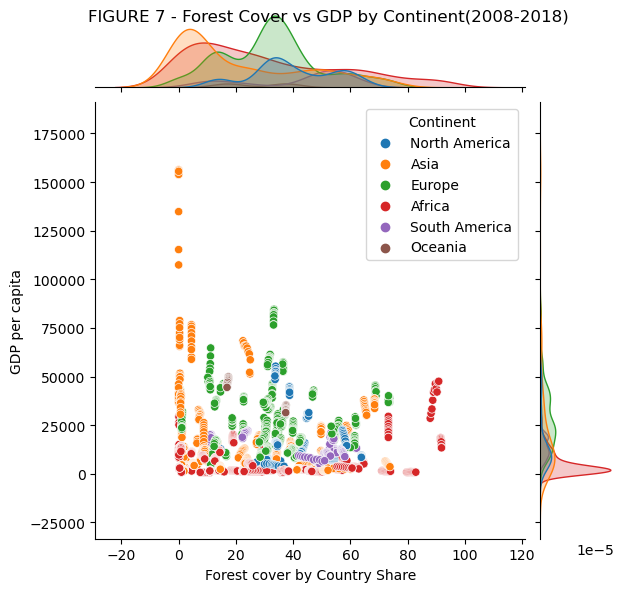

In [107]:
plt.show()